### Stock price prediction of test dataset 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
#'../ gives the relative paths'
model = load_model('../Models/Apple_model.h5')

In [25]:
dataset = pd.read_csv('../Data/AAPL.csv')

In [29]:
dataset = dataset.iloc[:,1:2].values

In [31]:
dataset

array([[1.28348000e-01],
       [1.22210000e-01],
       [1.13281000e-01],
       ...,
       [1.34289993e+02],
       [1.32080002e+02],
       [1.30070007e+02]])

In [32]:
train = dataset[:8375]
test = dataset[8375:]

In [33]:
test.shape

(2093, 1)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs = dataset[len(dataset) - len(test) - 60:]
inputs = scaler.fit_transform(inputs)

In [36]:
inputs.shape

(2153, 1)

In [37]:
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])

In [38]:
X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [39]:
predicted_stock_price = model.predict(X_test)

66/66 [==============================] - 1s 13ms/step


In [40]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

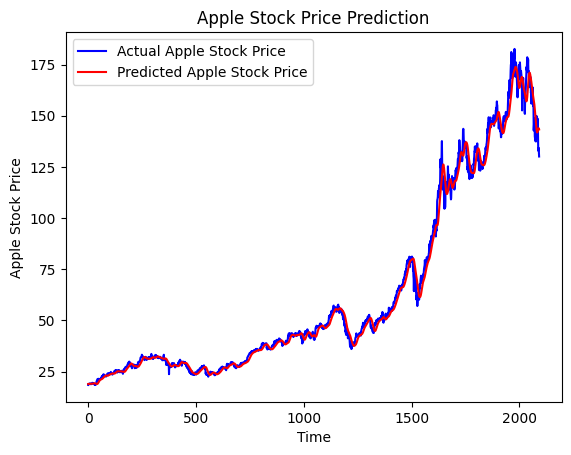

In [41]:
plt.plot(test, color = 'blue', label = 'Actual Apple Stock Price')
plt.plot (predicted_stock_price, color = 'red', label = 'Predicted Apple Stock Price') 
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel ('Apple Stock Price')
plt.legend ()
plt.show()

In [42]:
rmse = np.mean((test-predicted_stock_price)**2)
print(f'The test RMS error of the model was {rmse}')

The test RMS error of the model was 14.854313880635157


In [43]:
#Mean absolute percentage error
MAPE = np.mean(abs((test-predicted_stock_price)/test))
print(f'The MAPE value is : {MAPE}')

The MAPE value is : 0.03761602625131063
